<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Jerimiah_Willhite_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from sklearn.datasets.samples_generator import make_blobs
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [115]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df = df.drop('Unnamed: 32', axis=1)

In [117]:
df.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [0]:
scaler = StandardScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df))
pca = PCA(3) #number of Principle Components to reduce to
pca.fit(scaled)
pca_df = pd.DataFrame(pca.transform(scaled), columns=['PC 1', 'PC 2', 'PC 3'])

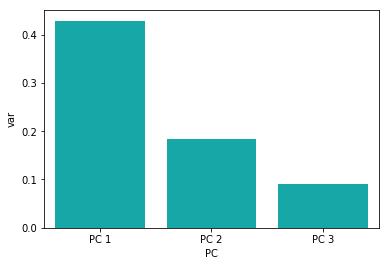

In [119]:
df_pc_variance = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC 1','PC 2','PC 3']})
sns.barplot(x='PC',y="var", 
           data=df_pc_variance, color="c");

In [120]:
df_pc_variance.head()

,var,PC
0,0.428647,PC 1
1,0.183768,PC 2
2,0.091464,PC 3


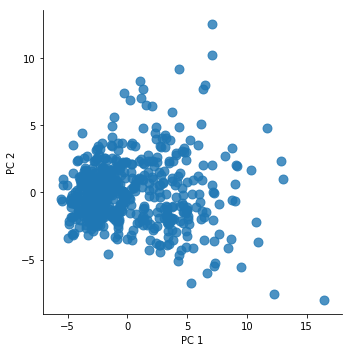

In [121]:
#taken from https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
sns.lmplot( x="PC 1", y="PC 2",
  data=pca_df, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [0]:
##### Your Code Here #####
kmeans = KMeans(n_clusters=10)
kmeans.fit(df)

df['clusters'] = kmeans.labels_

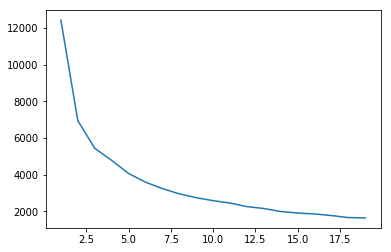

In [123]:
#elbow graph
distortions = []
k = range(1, 20)
for i in k:
    k_model = KMeans(n_clusters=i).fit(pca_df)
    distortions.append(k_model.inertia_)
    
plt.plot(k, distortions)
plt.show()

In [0]:
pca_df = pca_df.drop('PC 3', axis=1)

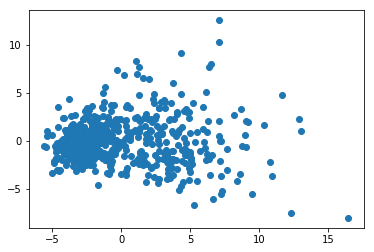

In [125]:
#we'll be using pca_df's PC 1 and PC 2 for x and y

plt.scatter(pca_df['PC 1'], pca_df['PC 2'])
plt.show()

In [107]:
#looking like it's mainly 2 groups, although an argument could be made for 3?
'''from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_df)
labels = kmeans.labels_

print(labels)'''

'from sklearn.cluster import KMeans \nkmeans = KMeans(n_clusters=2)\nkmeans.fit(pca_df)\nlabels = kmeans.labels_\n\nprint(labels)'

In [110]:
#adding labels to dataframe
#These two cells are used togeter with the sklearn KMeans method
'''new_series = pd.Series(labels)
pca_df['clusters'] = new_series.values

pca_df.head()'''

,PC 1,PC 2,clusters
0,9.184736,1.988755,0
1,2.384169,-3.730273,0
2,5.751186,-0.954574,0
3,7.134531,10.392445,0
4,3.954233,-1.837046,0


In [129]:
#getting samples

centroids = pca_df.sample(2)
centroids.head()

,PC 1,PC 2
225,-0.814699,-1.266065
89,1.253037,1.026048


In [0]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [131]:
first_pass = find_nearest_centroid(pca_df.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,PC 1,PC 2,cluster_1
0,9.183200,1.971271,1
1,2.383298,-3.753459,0
2,5.742472,-1.080350,1
3,7.124384,10.272225,1
4,3.945694,-1.959689,1


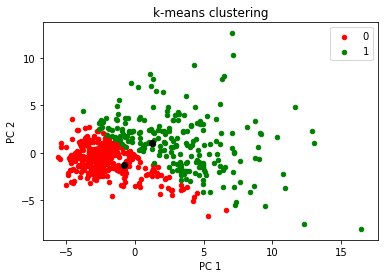

In [133]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green'}
  fig, ax = plt.subplots()
  plt.title('k-means clustering')
  
  ax.plot(centroids.iloc[0]['PC 1'], centroids.iloc[0]['PC 2'], "ok")
  ax.plot(centroids.iloc[1]['PC 1'], centroids.iloc[1]['PC 2'], "ok")
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='PC 1', y='PC 2', 
               label=key, color=colors[key])
  plt.show()

plot_clusters(first_pass, 'cluster_1', centroids)



In [0]:
#so here we are getting the centroids from the first pass and setting them to be used as centroids in the next pass
def get_centroids(df,column):
  return df.groupby(column).mean()

centroids = get_centroids(first_pass, 'cluster_1')

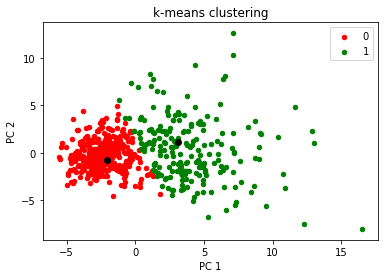

In [136]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

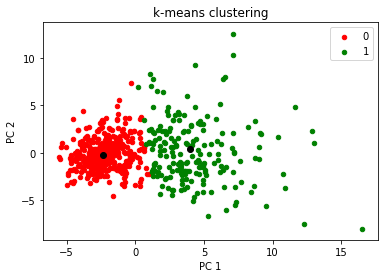

In [139]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

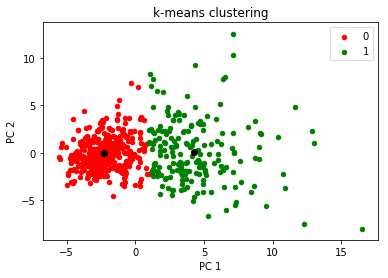

In [140]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

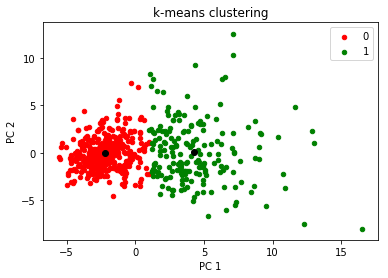

In [141]:
# Calculate New Centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
plot_clusters(fifth_pass, 'cluster_5', centroids)

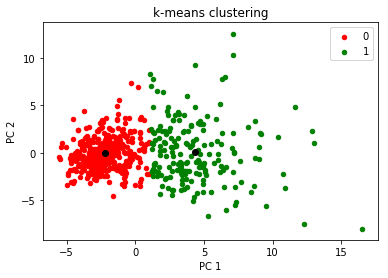

In [142]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
plot_clusters(sixth_pass, 'cluster_6', centroids)

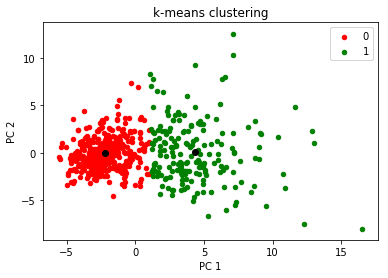

In [143]:
# Calculate New Centroids
centroids = get_centroids(sixth_pass, 'cluster_6')

# Get Clusters for New Centroids
seventh_pass = find_nearest_centroid(sixth_pass.select_dtypes(exclude='int64'), centroids, '7')

# Plot New Cluster
plot_clusters(seventh_pass, 'cluster_7', centroids)

In [144]:
convergence = np.array_equal(sixth_pass['cluster_6'], seventh_pass['cluster_7'])
#^Line above checks if we are at convergence, if no points changed

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  True


In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green'}
  fig, ax = plt.subplots()
  plt.title('k-means clustering')
  
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', 
               label=key, color=colors[key])
  plt.show()

def get_centroids(df,column):
  return df.groupby(column).mean()



In [0]:
plot_clusters(pca_df, )

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.